In [31]:
import random
import csv

# Listes de noms et prénoms
noms = ["Manzombi", "Kukwabantu", "Yoloyolo", "Andedi", "Nzeba", "Mbala", "Maketa", "Kalala", "Nsapu", "Kabong", "Kahindo", "Etumba", "Otshudi", "Yav", "Amani", "Buana", ]
prenoms = ["Rachel", "Joel", "Mariella", "Elvira", "Devernay", "Joseph",  "Alice", "Bob", "Charlie", "Diana", "Eve", "Frank", "Gina", "Hugo", "Iris", "Jack"]

# Liste des cours
cours = ["Math", "Physique", "Programmation parallele", "Finances bubliques", "Projet", "Algo", "c#", "Java EE", "Cloud Computing"  ]

# Fonction pour générer une note aléatoire
def generer_note():
  return random.randint(0, 20)

# Fonction pour générer un nom et un prénom aléatoires
def generer_nom_complet():
  nom = random.choice(noms)
  prenom = random.choice(prenoms)
  return nom + " " + prenom

# Ouvrir un fichier CSV en écriture
with open("etudiants_notes_10000.csv", "w", newline="") as fichier_csv:

  # Ecrire l'en-tête
  ecrivain_csv = csv.writer(fichier_csv)
  ecrivain_csv.writerow(["Nom complet"] + cours)

  # Pour 10000 étudiants
  for _ in range(10000000):

    # Générer le nom complet
    nom_complet = generer_nom_complet()

    # Générer les notes
    notes = [generer_note() for _ in range(len(cours))]

    # Ecrire la ligne dans le fichier CSV
    ecrivain_csv.writerow([nom_complet] + notes)


Calculons le pourcentage de chaque candidat séquentiellement

In [32]:
import csv
import time

# Fonction pour calculer le pourcentage d'un étudiant
def calculer_pourcentage(notes):
  total = sum(notes)
  pourcentage = (total / (len(notes) * 20)) * 100
  
  # print(pourcentage)
  return round(pourcentage, 2)

t0 = time.time()
# Ouvrir le fichier CSV en lecture
with open("etudiants_notes_10000.csv", "r", newline="") as fichier_csv:

  # Lire le fichier ligne par ligne
  lecteur_csv = csv.reader(fichier_csv)

  # Sauter l'en-tête
  next(lecteur_csv, None)

  # Pour chaque ligne
  for ligne in lecteur_csv:

    # Extraire les notes
    notes = [int(note) for note in ligne[1:]]

    # Calculer le pourcentage
    pourcentage = calculer_pourcentage(notes)

    # Afficher le nom de l'étudiant et son pourcentage
    # print(f"{ligne[0]}: {pourcentage}%")

  t1 = time.time()
  print(f'temps d\'execution {t1 - t0} s')


temps d'execution 19.916671991348267 s


Utlilisons des processus pour pour paralleliser le calcul en attribuant à chaque processus un lot particulier de données en fonctions du nombre de données à traiter et du nombre de processus. Par exemple pour trois processus devant traiter 10 données nous
``` 
 taille_lot = données à traiter / nombre de processus 
            = 10 / 3 
            = 3
```
Pour chaque processus il y'aura environ 3 donnée à traiter.  Ainsi nous auront des intervals avec des début et des fins espacés de 3 pour la plupart

- debuts = [0, 3, 6]
- fins = [2, 5, 10]

Chaque processus executera de ce fait la fonction de traitement avec ses paramètres début et fun

- process_1 -> 0, 2
- process_2 -> 3, 5
- process_1 -> 6, 10


In [ ]:
import csv
import multiprocessing
from itertools import islice 
import time
import json


def var_dump(var):
  json_data = json.dumps(var, indent=4)
  print(json_data)

# Fonction pour calculer le pourcentage d'un étudiant
def calculer_pourcentage(notes):
  total = sum(notes)
  pourcentage = (total / (len(notes) * 20)) * 100
  return round(pourcentage, 2)

def traiter_ligne(ligne):
      # Extraire les notes
      notes = [int(note) for note in ligne[1:]]
      # Calculer le pourcentage
      return ligne[0], calculer_pourcentage(notes)

# Fonction pour traiter un lot d'étudiants
def traiter_lot(fichier_csv, debut, fin):
  t0 = time.time()
  with open(fichier_csv, "r", newline="") as fichier:
    lecteur_csv = csv.reader(fichier)
    # Sauter l'en-tête
    lecteur_csv = islice(lecteur_csv, 1, None)
    # Itérer sur les étudiants du lot
  
    # for ligne in islice(lecteur_csv, debut, fin + 1):
    #   # Extraire les notes
    #   notes = [int(note) for note in ligne[1:]]
    #   # Calculer le pourcentage
    #   pourcentage = calculer_pourcentage(notes)
    #   # Afficher le nom de l'étudiant et son pourcentage
    #   # print(f"{noms[i]}: {pourcentage} % \n")
    
    pourcentages_lot =  map(lambda ligne: traiter_ligne(ligne), islice(lecteur_csv, debut, fin + 1))
    
    
    # SI LE FICHIER EST TROP GRAND, NE PAS UTILISER PRINT
    # POUR NE PAS SURCHARGER LE FLUX DE SORTIE ET SUR CHARGER LA RAM
    
    # print(f"\n  {debut} --- {fin} \n")
    # var_dump(list(pourcentages_lot))

    len(list(pourcentages_lot))
    
  t1 = time.time()
  print(f'\n temps d\'execution {t1 - t0} s')
  return pourcentages_lot
  # return pourcentages_lot
  

# Fonction principale
def main():
  # Ouvrir le fichier CSV des étudiants en lecture
  with open("etudiants_notes_10000.csv", "r", newline="") as fichier_csv:
    # Lire les noms des étudiants
    lecteur_csv = islice(csv.reader(fichier_csv), 1, None)

    nbr_candidats = 10000000
    # nbr_candidats = len(list(lecteur_csv))
    # noms = [ligne[0] for ligne in lecteur_csv]
  
  # Définir le nombre de processus
  nb_processus = 4

  # Déterminer la taille de chaque lot
  taille_lot = nbr_candidats // nb_processus

#   print(taille_lot)
  # Définir les débuts et fins de chaque lot
  debuts = [(i * taille_lot)  for i in range(nb_processus)]
  fins = [debut + taille_lot - 1 for debut in debuts]
  fins[-1] = nbr_candidats

  print(debuts)
  print(fins)

  # Créer et démarrer les processus
  processus = []
  for i in range(nb_processus):
    processus.append(multiprocessing.Process(
      target=traiter_lot,
      args=("etudiants_notes_10000.csv", debuts[i], fins[i]))
    )
    processus[i].start()

  # Attendre la fin de tous les processus
  for processus in processus:
    processus.join()

# Appeler la fonction principale
if __name__ == "__main__":
  
  main()
  



## Test Matplotlib

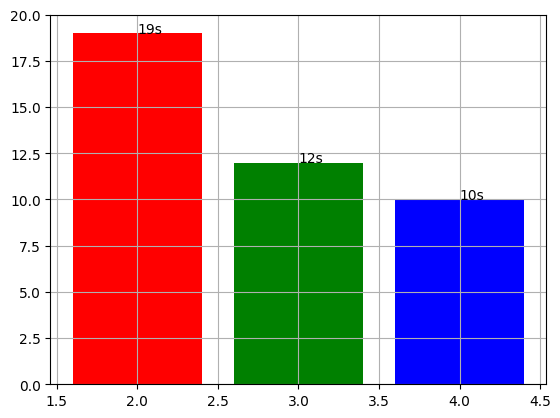

In [47]:
import matplotlib.pyplot as plt
nb_processus = [2, 3, 4]
temps_execution = [19, 12, 10]
plt.bar(nb_processus, temps_execution, color=["red", "green", "blue"])
for i in range(len(nb_processus)):
  plt.text(nb_processus[i], temps_execution[i], f"{temps_execution[i]}s")
plt.grid(True)
plt.ylim(0, 20)
plt.show()


[0, 5000000]
[4999999, 10000000]

 temps d'execution 10.57901382446289 s

 temps d'execution 13.078329086303711 s
[0, 3333333, 6666666]
[3333332, 6666665, 10000000]

 temps d'execution 7.330169677734375 s

 temps d'execution 9.007369041442871 s

 temps d'execution 10.570387601852417 s
[0, 2500000, 5000000, 7500000]
[2499999, 4999999, 7499999, 10000000]

 temps d'execution 6.177728176116943 s

 temps d'execution 7.930311918258667 s

 temps d'execution 9.249009370803833 s

 temps d'execution 10.645950555801392 s


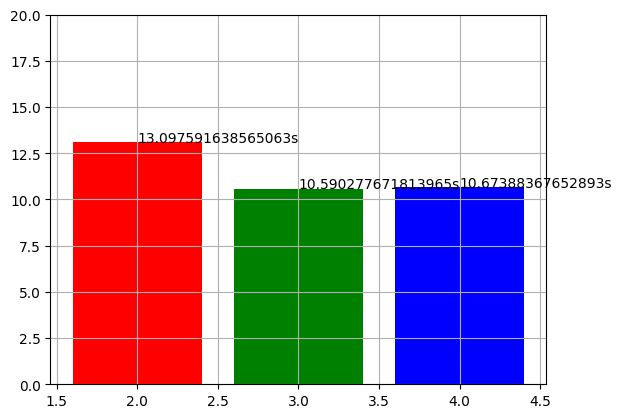

In [54]:
import csv
import multiprocessing
from itertools import islice 
import time
import json
import matplotlib.pyplot as plt

def var_dump(var):
  json_data = json.dumps(var, indent=4)
  print(json_data)

# Fonction pour calculer le pourcentage d'un étudiant
def calculer_pourcentage(notes):
  total = sum(notes)
  pourcentage = (total / (len(notes) * 20)) * 100
  return round(pourcentage, 2)

def traiter_ligne(ligne):
      # Extraire les notes
      notes = [int(note) for note in ligne[1:]]
      # Calculer le pourcentage
      return ligne[0], calculer_pourcentage(notes)

# Fonction pour traiter un lot d'étudiants
def traiter_lot(fichier_csv, debut, fin):
  t0 = time.time()
  with open(fichier_csv, "r", newline="") as fichier:
    lecteur_csv = csv.reader(fichier)
    # Sauter l'en-tête
    lecteur_csv = islice(lecteur_csv, 1, None)
    # Itérer sur les étudiants du lot

    pourcentages_lot =  map(lambda ligne: traiter_ligne(ligne), islice(lecteur_csv, debut, fin + 1))

    len(list(pourcentages_lot))
    
  t1 = time.time()
  print(f'\n temps d\'execution {t1 - t0} s')
  return pourcentages_lot
  # return pourcentages_lot
  
# Fonction principale
def main(nb_processus, nbr_candidats):
  
  t0_global = time.time()

  # Ouvrir le fichier CSV des étudiants en lecture
  with open("etudiants_notes_10000.csv", "r", newline="") as fichier_csv:
    # Lire les noms des étudiants
    lecteur_csv = islice(csv.reader(fichier_csv), 1, None)

  taille_lot = nbr_candidats // nb_processus

  debuts = [(i * taille_lot)  for i in range(nb_processus)]
  fins = [debut + taille_lot - 1 for debut in debuts]
  fins[-1] = nbr_candidats

  print(debuts)
  print(fins)

  processus = []
  for i in range(nb_processus):
    processus.append(multiprocessing.Process(
      target=traiter_lot,
      args=("etudiants_notes_10000.csv", debuts[i], fins[i]))
    )
    processus[i].start()

  # Attendre la fin de tous les processus
  for processus in processus:
    processus.join()

  t1_global = time.time()

  return round(t1_global - t0_global, 2)

# Appeler la fonction principale
if __name__ == "__main__":

  nb_processus = []
  temps_execution = []
  for i in range(2,5):
    nb_processus.append(i)
    temps_execution.append(
      main(nb_processus = i, nbr_candidats = 10000000)
    ) 

    
  
  
  plt.bar(nb_processus, temps_execution, color=["red", "green", "blue"])
  for i in range(len(nb_processus)):
    plt.text(nb_processus[i], temps_execution[i], f"{temps_execution[i]}s")
  plt.grid(True)
  plt.ylim(0, 20)
  plt.show()

  
  



### Utilisation des pools de processus

In [5]:
import csv
import time
from multiprocessing import Pool

def calculer_pourcentage(notes):
  total = sum(notes)
  pourcentage = (total / (len(notes) * 20)) * 100
  return round(pourcentage, 2)

def main():
  t0 = time.time()

  fichier_csv = open("etudiants_notes_10000.csv", "r", newline="")

  with Pool() as pool:
    lecteur_csv = csv.reader(fichier_csv)
    # Sauter l'en-tête
    next(lecteur_csv, None)
    
    # Envoyer chaque ligne à un processus pour calculer le pourcentage
    pourcentages = pool.map(calculer_pourcentage, map(lambda ligne: [int(note) for note in ligne[1:]], lecteur_csv))

  fichier_csv.close()

  t1 = time.time()

  # # Afficher les résultats
  # for i, ligne in enumerate(lecteur_csv):
  #   print(f"{ligne[0]}: {pourcentages[i]}%")

  print(f"Temps d'exécution : {t1 - t0} s")

if __name__ == "__main__":
  main()


Temps d'exécution : 23.015197038650513 s


### Utilisation du Manager

Rendons le code plus dynamique en créant des processus en fonctions du nombre de coeurs sur la machine

In [163]:
import csv
import multiprocessing
from itertools import islice
import time

def nombre_coeurs():
  return multiprocessing.cpu_count()

# Fonction pour calculer le pourcentage d'un étudiant
def calculer_pourcentage(notes):
  total = sum(notes)
  pourcentage = (total / (len(notes) * 20)) * 100
  return round(pourcentage, 2)

# Fonction pour traiter un lot d'étudiants
def traiter_lot(fichier_csv, noms, debut, fin):
  with open(fichier_csv, "r", newline="") as fichier:
    lecteur_csv = csv.reader(fichier)
    # Sauter l'en-tête
    lecteur_csv = islice(lecteur_csv, 1, None)
    # Itérer sur les étudiants du lot
   
    for i, ligne in enumerate(lecteur_csv):
      # print(debut)
      # print(fin)
      # print("\n")
      if i not in range(debut, fin + 1 ): 
        continue
      # Extraire les notes
      notes = [int(note) for note in ligne[1:]]
      # Calculer le pourcentage
      pourcentage = calculer_pourcentage(notes)
      # Afficher le nom de l'étudiant et son pourcentage
      print(f"{noms[i]}: {pourcentage} % \n")

# Fonction principale
def main():
  # Ouvrir le fichier CSV des étudiants en lecture
  with open("etudiants_notes_10000.csv", "r", newline="") as fichier_csv:
    # Lire les noms des étudiants
    lecteur_csv = islice(csv.reader(fichier_csv), 1, None)

    noms = [ligne[0] for ligne in lecteur_csv]

  # Définir le nombre de processus
  nb_processus = nombre_coeurs()

  # Déterminer la taille de chaque lot
  taille_lot = len(noms) // nb_processus

#   print(taille_lot)
  # Définir les débuts et fins de chaque lot
  debuts = [(i * taille_lot)  for i in range(nb_processus)]
  fins = [debut + taille_lot - 1 for debut in debuts]
  fins[-1] = len(noms)

  print(debuts)
  print(fins)

  # Créer et démarrer les processus
  processus = []
  for i in range(nb_processus):
    processus.append(multiprocessing.Process(
      target=traiter_lot,
      args=("etudiants_notes_10000.csv", noms, debuts[i], fins[i]))
    )
    processus[i].start()

  # Attendre la fin de tous les processus
  for processus in processus:
    processus.join()

# Appeler la fonction principale
if __name__ == "__main__":
  t0 = time.time()
  main()
  t1 = time.time()
  print(f'temps d\'execution {t1 - t0} s')


[0, 3, 6]
[2, 5, 10]
1 Nsapu Charlie: 55.56 % 

2 Kukwabantu Bob: 41.11 % 

3 Yav Joseph: 47.22 % 
4 Amani Rachel: 39.44 % 


5 Kukwabantu Alice: 48.89 % 

6 Buana Joel: 51.67 % 
7 Nzeba Mariella: 43.89 % 


8 Etumba Hugo: 65.56 % 

9 Mbala Diana: 59.44 % 

10 Manzombi Gina: 32.22 % 



## Autres Commentaires

Nous pouvons constater aussi que parmi les problème de parallelisation vu au à l'introduction comme la dépendance des données:

> Ici, il s'agit pour nous de calculer seulement le  pourcentage. La dépendance des données n'est pas evidente à ressortir parce qu'on peut imaginer dans un cas extreme, avoir par étudiant, des centaines de cours  traités dans plusieurs threads pour calculer le pourcentage (Tout en faisant abstraction de l'efficacité effective de cette approche).

Parcontre s'il nous ait démandé de .....

Nous avons utiliser le principe de diviser pour mieux reigner en divisant les données en lots à traiter

## Utilisation des fils d'attente (Queue)

In [36]:
import csv
import multiprocessing
from queue import Queue
from itertools import islice
import time

def nombre_coeurs():
  return multiprocessing.cpu_count()

def calculer_pourcentage(notes):
  total = sum(notes)
  pourcentage = (total / (len(notes) * 20)) * 100
  return round(pourcentage, 2)

def traiter_lot(fichier_csv, noms, queue):
  with open(fichier_csv, "r", newline="") as fichier:
    lecteur_csv = csv.reader(fichier)
    # Sauter l'en-tête
    next(lecteur_csv, None)
    # Itérer sur les étudiants du lot
    while True:
      # Tenter de récupérer un élément de la file d'attente
      if queue.empty():
        # print("------------LOL--------------")
        break

      etudiant, notes_obtenues = queue.get(block=False)
      queue.task_done()
      # print("------------YOW--------------")
    
      # Extraire les notes
      notes = [int(note) for note in notes_obtenues]
      # Calculer le pourcentage
      pourcentage = calculer_pourcentage(notes)
      # Afficher le nom de l'étudiant et son pourcentage
      print(f"{etudiant}: {pourcentage}% \n\n" )
      



def main():
  # Ouvrir le fichier CSV des étudiants en lecture
  with open("etudiants_notes_10000.csv", "r", newline="") as fichier_csv:
    # Lire les noms des étudiants
     # Sauter l'en-tête
    lecteur_csv = islice(fichier_csv, 1, None)
    noms = []

  
    queue = Queue()
  # Ajouter les étudiants à la file d'attente
    for  etudiant in lecteur_csv :
      # print(etudiant.split(","))
      etudiant = next(csv.reader(csv.StringIO(etudiant), delimiter=','))
      queue.put((etudiant[0], etudiant[1:]))

  # Définir le nombre de processus
  nb_processus = nombre_coeurs()

  # Créer une file d'attente
 

  # Créer et démarrer les processus
  processus = []
  for i in range(nb_processus):
    processus.append(multiprocessing.Process(
      target=traiter_lot,
      args=("etudiants_notes_10000.csv", noms, queue)))
    processus[i].start()

  # Attendre la fin de tous les processus
  for processus in processus:
    processus.join()

# Appeler la fonction principale
if __name__ == "__main__":
  t0 = time.time()
  main()
  t1 = time.time()
  print(f'temps d\'execution {t1 - t0} s')


1 Nsapu Charlie: 55.56% 


2 Kukwabantu Bob: 41.11% 

1 Nsapu Charlie: 55.56% 



3 Yav Joseph: 47.22% 


1 Nsapu Charlie: 55.56% 

4 Amani Rachel: 39.44% 

2 Kukwabantu Bob: 41.11% 




3 Yav Joseph: 47.22% 

2 Kukwabantu Bob: 41.11% 


4 Amani Rachel: 39.44% 

5 Kukwabantu Alice: 48.89% 




3 Yav Joseph: 47.22% 

1 Nsapu Charlie: 55.56% 

6 Buana Joel: 51.67% 

5 Kukwabantu Alice: 48.89% 


1 Nsapu Charlie: 55.56% 


4 Amani Rachel: 39.44% 



7 Nzeba Mariella: 43.89% 


6 Buana Joel: 51.67% 



2 Kukwabantu Bob: 41.11% 


1 Nsapu Charlie: 55.56% 

5 Kukwabantu Alice: 48.89% 

2 Kukwabantu Bob: 41.11% 

7 Nzeba Mariella: 43.89% 






8 Etumba Hugo: 65.56% 



6 Buana Joel: 51.67% 

3 Yav Joseph: 47.22% 

1 Nsapu Charlie: 55.56% 

8 Etumba Hugo: 65.56% 

3 Yav Joseph: 47.22% 

2 Kukwabantu Bob: 41.11% 







9 Mbala Diana: 59.44% 


4 Amani Rachel: 39.44% 

7 Nzeba Mariella: 43.89% 

1 Nsapu Charlie: 55.56% 

9 Mbala Diana: 59.44% 


2 Kukwabantu Bob: 41.11% 


3 Yav Joseph: 47.22% 



4 Amani Rachel: 39.44% 

8 Etumba Hugo: 65.56% 

10 Manzombi Gina: 32.22% 

5 Kukwabantu Alice: 48.89% 

10 Manzombi Gina: 32.22% 






4 Amani Rachel: 39.44% 


2 Kukwabantu Bob: 41.11% 

5 Kukwabantu Alice: 48.89% 



9 Mbala Diana: 59.44% 



6 Buana Joel: 51.67% 


3 Yav Joseph: 47.22% 


6 Buana Joel: 51.67% 

7 Nzeba Mariella: 43.89% 

3 Yav Joseph: 47.22% 


5 Kukwabantu Alice: 48.89% 




7 Nzeba Mariella: 43.89% 

4 Amani Rachel: 39.44% 





10 Manzombi Gina: 32.22% 

4 Amani Rachel: 39.44% 

8 Etumba Hugo: 65.56% 


6 Buana Joel: 51.67% 

8 Etumba Hugo: 65.56% 

5 Kukwabantu Alice: 48.89% 




7 Nzeba Mariella: 43.89% 



## Utilisation des verrous

In [74]:
import csv
import multiprocessing
from queue import Queue
# from threading import Lock
import time

from itertools import islice
queue = Queue()

def nombre_coeurs():
  return multiprocessing.cpu_count()

def calculer_pourcentage(notes):
  total = sum(notes)
  pourcentage = (total / (len(notes) * 20)) * 100
  return round(pourcentage, 2)

def traiter_lot(fichier_csv, queue, verrou):
  with open(fichier_csv, "r", newline="") as fichier:
    lecteur_csv = csv.reader(fichier)
    # Sauter l'en-tête
    next(lecteur_csv, None)
    # Itérer sur les étudiants du lot
    while True:
      # Tenter de récupérer un élément de la file d'attente
      if queue.empty():
        # print("------------LOL--------------")
        break
      # Acquérir le verrou
      verrou.acquire()
      print(f"Process {multiprocessing.current_process().name} sur a le verrou")
      etudiant, notes_obtenues = queue.get(block=False)
      queue.task_done()
      # print("------------YOW--------------")
      notes = [int(note) for note in notes_obtenues]
      # Libérer le verrou
      verrou.release()
    
      # Extraire les notes
  
      # Calculer le pourcentage
      pourcentage = calculer_pourcentage(notes)
      # Afficher le nom de l'étudiant et son pourcentage
      print(f"{etudiant}: {pourcentage}% \n\n" )
      
def main():
  # Ouvrir le fichier CSV des étudiants en lecture
  with open("etudiants_notes_10000.csv", "r", newline="") as fichier_csv:
    # Lire les noms des étudiants
     # Sauter l'en-tête
    lecteur_csv = islice(fichier_csv, 1, None)
 
  # Ajouter les étudiants à la file d'attente
    for  etudiant in lecteur_csv :
      # print(etudiant.split(","))
      etudiant = next(csv.reader(csv.StringIO(etudiant), delimiter=','))
      queue.put((etudiant[0], etudiant[1:]))

  # Définir le nombre de processus
  nb_processus = nombre_coeurs()

  # Créer une file d'attente
 
  # Créer un verrou
  verrou = multiprocessing.Lock()
  # Créer et démarrer les processus
  processus = []
  for i in range(nb_processus):
    processus.append(multiprocessing.Process(
      target=traiter_lot,
      args=("etudiants_notes_10000.csv", queue, verrou)))
    processus[i].start()

  # Attendre la fin de tous les processus
  for processus in processus:
    processus.join()

# Appeler la fonction principale
if __name__ == "__main__":
    t0 = time.time()
    main()
    t1 = time.time()
    print(f'temps d\'execution {t1 - t0} s')


Process Process-415 sur a le verrou
1 Nsapu Charlie: 55.56% 

Process Process-416 sur a le verrou

1 Nsapu Charlie: 55.56% 

Process Process-415 sur a le verrou

2 Kukwabantu Bob: 41.11% 


Process Process-417 sur a le verrou
1 Nsapu Charlie: 55.56% 

Process Process-416 sur a le verrou

2 Kukwabantu Bob: 41.11% 


Process Process-418 sur a le verrou
Process Process-415 sur a le verrou1 Nsapu Charlie: 55.56% 



3 Yav Joseph: 47.22% 

Process Process-419 sur a le verrou

1 Nsapu Charlie: 55.56% 

Process Process-417 sur a le verrou

2 Kukwabantu Bob: 41.11% 


Process Process-420 sur a le verrou
1 Nsapu Charlie: 55.56% 

Process Process-416 sur a le verrou

3 Yav Joseph: 47.22% 


Process Process-421 sur a le verrou
Process Process-418 sur a le verrou1 Nsapu Charlie: 55.56% 



2 Kukwabantu Bob: 41.11% 


Process Process-422 sur a le verrou
Process Process-415 sur a le verrou1 Nsapu Charlie: 55.56% 



4 Amani Rachel: 39.44% 

Process Process-419 sur a le verrou

2 Kukwabantu Bob: 41.1

Problème de synchronisation avec les processus étant donné leurs indépendance

## Utilisation des threads

In [54]:
import csv
import threading
from queue import Queue
from threading import Lock
from itertools import islice

import time

# Créer une file d'attente
queue = Queue()

# Fonction pour calculer le pourcentage
def calculer_pourcentage(notes):
  total = sum(notes)
  pourcentage = (total / (len(notes) * 20)) * 100
  return round(pourcentage, 2)

def traiter_lot(fichier_csv, verrou):
  with open(fichier_csv, "r", newline="") as fichier:
    lecteur_csv = csv.reader(fichier)
    # Sauter l'en-tête
    next(lecteur_csv, None)
    # Itérer sur les étudiants du lot
    while True:
      # Tenter de récupérer un élément de la file d'attente
      if queue.empty():
        # print("------------LOL--------------")
        break
      # Acquérir le verrou
      verrou.acquire()
      etudiant, notes_obtenues = queue.get(block=False)
      queue.task_done()
      # print("------------YOW--------------")
      # Libérer le verrou
      verrou.release()
    
      # Extraire les notes
      notes = [int(note) for note in notes_obtenues]
      # Calculer le pourcentage
      pourcentage = calculer_pourcentage(notes)
      # Afficher le nom de l'étudiant et son pourcentage
      # print(f"[Thread ID: {threading.get_ident()}] : {etudiant}: {pourcentage}% \n\n" )

def main():
  # Ouvrir le fichier CSV des étudiants en lecture
  with open("etudiants_notes_10000.csv", "r", newline="") as fichier_csv:
    # Lire les noms des étudiants
    lecteur_csv = islice(fichier_csv, 1, None)

    # Ajouter les étudiants à la file d'attente
    for etudiant in lecteur_csv:
      etudiant = next(csv.reader(csv.StringIO(etudiant), delimiter=','))
      queue.put((etudiant[0], etudiant[1:]))

  # Définir le nombre de threads
  nb_threads = 1
  verrou = Lock()
  # Créer et démarrer les threads
  threads = []
  for i in range(nb_threads):
    threads.append(threading.Thread(
      target=traiter_lot,
      args=("etudiants_notes_10000.csv", verrou)
    ))
    threads[i].start()

  # Attendre la fin de tous les threads
  for thread in threads:
    thread.join()

# Appeler la fonction principale
if __name__ == "__main__":
  t0 = time.time()
  main()
  t1 = time.time()
  print(f'temps d\'execution {t1 - t0} s')


temps d'execution 0.7101891040802002 s


## Utilisation de pool de processus